
<h1 align=center><font size = 5> Final Project for IBM Data Science Certification</font></h1>

This notebook aims to present the analysis on the prediction for car incidents which is the topic for the final capstone project of IBM data science professional Certificate.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [1]:
#print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.info()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [117]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [32]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

#### Converting datetype

In [3]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

# Extract year, month, day, hour and weekday

df['Year']=df['INCDTTM'].dt.year
df['Month']=df['INCDTTM'].dt.strftime('%b')
df['Day']=df['INCDTTM'].dt.day
df['Hour']=df['INCDTTM'].dt.hour
df['Weekday']=df['INCDTTM'].dt.strftime('%a')

#### Checking the missing values

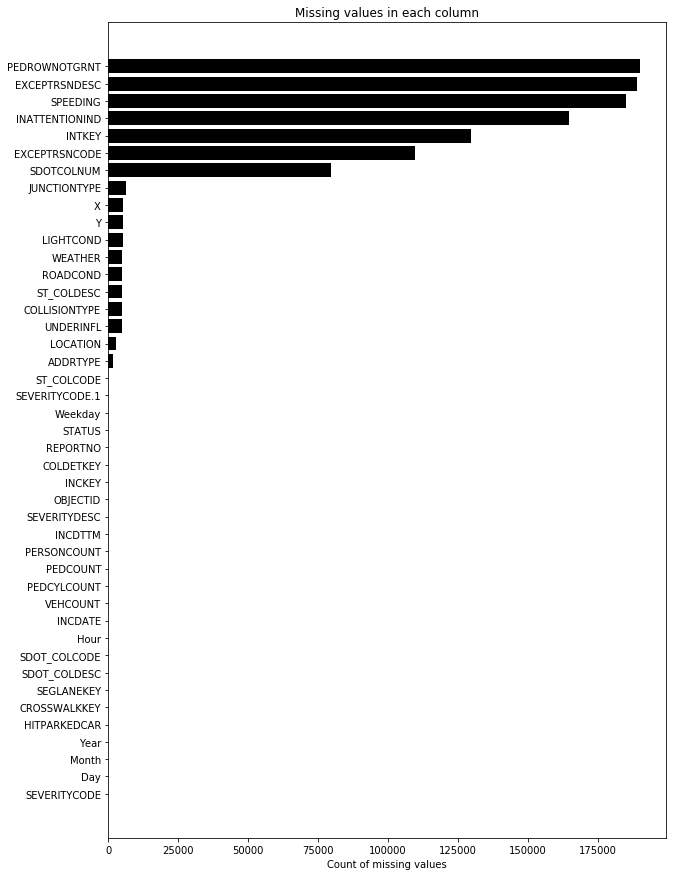

In [47]:
import matplotlib.pyplot as plt

missing_df = df.isna().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(10,15))
rects = ax.barh(ind,missing_df.missing_count.values,color='black')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Missing values in each column")
plt.show()

From this graph we can notice that the missing values for variable such as WEATHER,ROADCOND, LIGHTCOND, JUNCTIONTYPE seem unsignificant (~2%) over the total value of the rows of the entire dataset so we will drop them.

The others variable with high number of missing will not be considered for the analysis.

### Data visualization 

We will visualize different kind of plot in function of severity
- Total number of incidents based on Weather condition
- Total number of accidents based on Road condition
- Total number of accidents based on Light condition

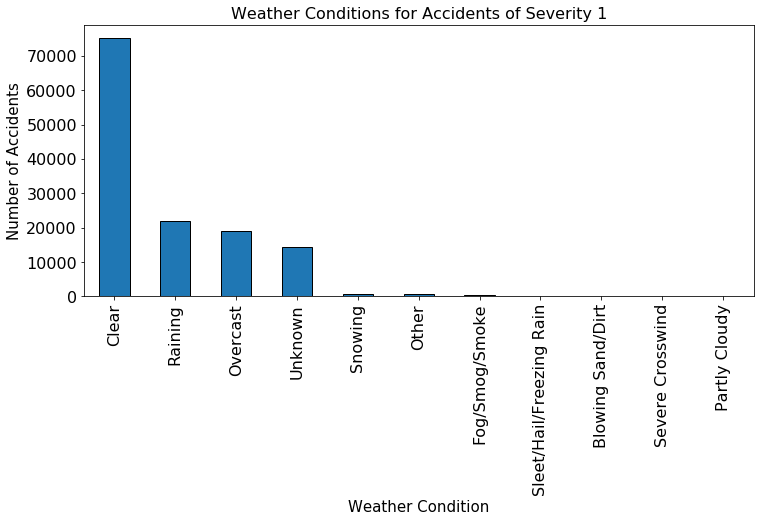

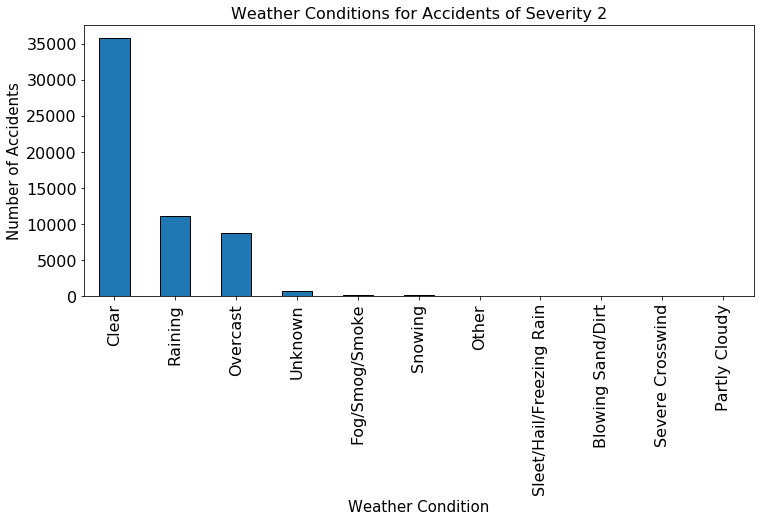

In [179]:
for s in np.arange(1,3):
    plt.subplots(figsize=(12,5))
    df.loc[df['SEVERITYCODE']==s]['WEATHER'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=15)
    plt.ylabel('Number of Accidents',fontsize=15)
    plt.title('Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [489]:
road_df = df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts().to_frame(name='Total').reset_index()

,SEVERITYCODE,ROADCOND,Total
0,1,Dry,84446
1,1,Wet,31719
2,1,Unknown,14329
3,1,Ice,936
4,1,Snow/Slush,837
5,1,Other,89
6,1,Standing Water,85
7,1,Sand/Mud/Dirt,52
8,1,Oil,40
9,2,Dry,40064


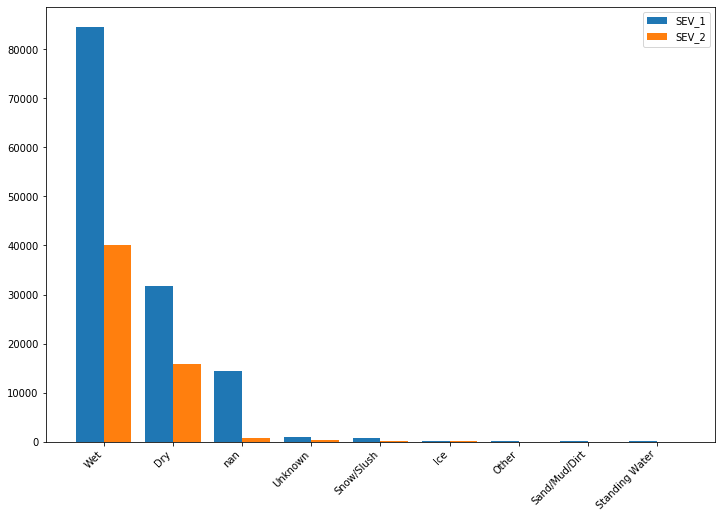

In [493]:
x = np.arange(len(road_df.ROADCOND.unique()))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 8))
b1 = ax.bar(x, road_df.loc[road_df['SEVERITYCODE'] == 1, 'Total'], 
            width=bar_width, label='SEV_1')
b2 = ax.bar(x + bar_width, road_df.loc[road_df['SEVERITYCODE'] == 2,'Total'], 
            width=bar_width, label='SEV_2')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df.ROADCOND.unique(),rotation=45, ha='right')

#legend
ax.legend()

In [500]:
light_df = df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts().to_frame(name='Total').reset_index()

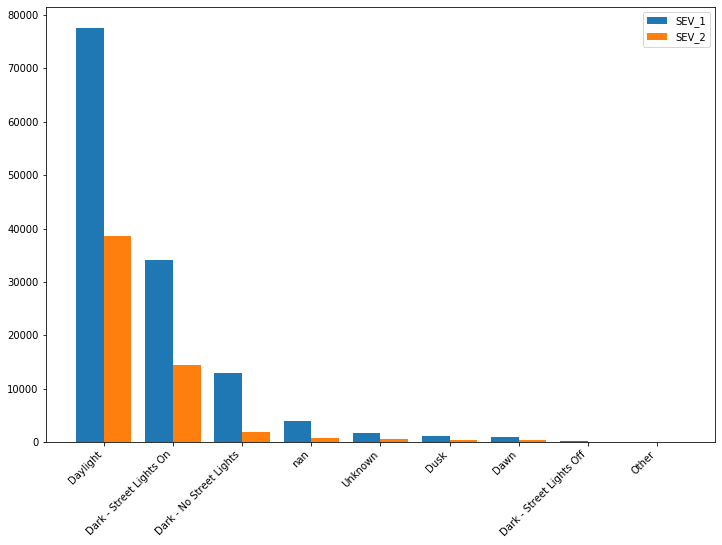

In [499]:
x1 = np.arange(len(light_df.LIGHTCOND.unique()))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 8))
b1 = ax.bar(x1, light_df.loc[light_df['SEVERITYCODE'] == 1, 'Total'], 
            width=bar_width, label='SEV_1')
b2 = ax.bar(x1 + bar_width, light_df.loc[light_df['SEVERITYCODE'] == 2,'Total'], 
            width=bar_width, label='SEV_2')

# Fix the x-axes.
ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(df.LIGHTCOND.unique(),rotation=45, ha='right')

#legend
ax.legend()

From these 3 graphs we can affirm that most of accidents happen in Daylight when road is wet and clear wheater.

In [108]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         3.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.4-py37hc8dfbb8~ --> anaconda::conda-4.8.4-py37_0



conda-4.8.4          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: / WARNING conda.core.path_actions:verify(963): Unable to create environments file. Path not writable.
  environment location: /Users/MSNitemzem/.conda/environments.txt

done
Executing transaction: done


### Convert Categorical features to numerical values

In [4]:
# we define a list of feature which can be use for the prediction 

Feature_list = df[['JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','INCDTTM',
                   'Year','Month','Day','Hour','Weekday']]

we first analyse the severity on a small set of feature 

In [5]:
Feature = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]

In [530]:
Feature.isna().sum()

SEVERITYCODE       0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [6]:
# replace NaN with unknown

Feature.fillna("Unknown", inplace = True)
Feature.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


### Perform one-hot encoding

Since the feature we select cannot be classify on a scale we decide to perform one-hot encoding

In [7]:
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)

Perform the one hot encoding also on the ROADCOND, LIGHTCOND

In [8]:
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)

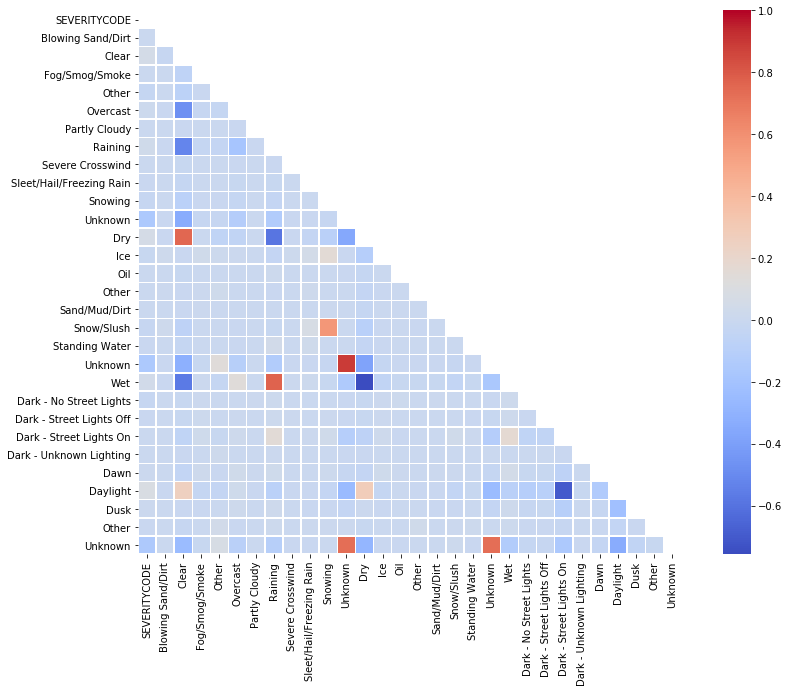

In [544]:
#correlation matrix

import seaborn as sns
corrmat = Feature.corr()
f, ax = plt.subplots(figsize=(15, 10))

#Mask To Hide Upper Triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(corrmat,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm')

#add the column names as labels
ax.set_yticklabels(corrmat.columns, rotation = 0)
ax.set_xticklabels(corrmat.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

We can notice small correlation between some light condition and severity as well as road condition. we can see a strong correlation between road and light condition.

### Balancing dataset

we will balance the data in order to avoid bias by resampling the target variable which is SEVERITYCODE using random under-sampling

In [9]:
Feature['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [10]:
#perform random under_sampling
sev_1, sev_2 = Feature['SEVERITYCODE'].value_counts()

#new dataframe based on lower total severity i.e. severity 2
df_sev_2 = Feature[Feature['SEVERITYCODE'] == 2]

#randomly select a dataframe within severity 1 based on number of severity 2 count
df_sev_1 = Feature[Feature['SEVERITYCODE'] == 1].sample(sev_2, random_state = 42)

In [11]:
# Concatenate both df_sev_1 and df_sev_2

df_final = pd.concat([df_sev_1, df_sev_2])
df_final.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
8105,1,Clear,Dry,Unknown,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76753,1,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
113125,1,Raining,Wet,Daylight,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
21423,1,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
24355,1,Clear,Dry,Daylight,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [550]:
df_final.columns

Index(['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'Blowing Sand/Dirt',
       'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast', 'Partly Cloudy',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Unknown', 'Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On',
       'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Other',
       'Unknown'],
      dtype='object')

In [54]:
SEVERITY_1, SEVERITY_2 = df_final['SEVERITYCODE'].value_counts()
print ("SEVERITY_1:", SEVERITY_1, "\nSEVERITY_2:",SEVERITY_2)

SEVERITY_1: 58188 
SEVERITY_2: 58188


### Feature selection and Preprocessing

In [12]:
X = df_final[['Blowing Sand/Dirt',
       'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast', 'Partly Cloudy',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Unknown', 'Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On',
       'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Other',
       'Unknown']]

X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Other,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Other,Other,Unknown,Unknown,Unknown
8105,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76753,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
113125,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
21423,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24355,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
y = df_final['SEVERITYCODE']

y[0:5]

8105      1
76753     1
113125    1
21423     1
24355     1
Name: SEVERITYCODE, dtype: int64

In [14]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.01658452,  0.84428806, -0.05476565, -0.0600396 , -0.02639137,
        -0.03239485, -0.41100688, -0.00655485, -0.46239073, -0.01208717,
        -0.02417963, -0.06455724, -0.25209546, -0.25126547,  4.23900851,
         0.72690259, -0.07649438, -0.01759085, -0.0600396 , -0.02639137,
        -0.03239485, -0.01944808, -0.06776712, -0.02417963, -0.25209546,
        -0.25126547,  4.23900851, -0.57795883, -0.08465136, -0.07812535,
        -0.57605377, -0.00829141, -0.1150773 , -1.26367205, -0.18037492,
        -0.0600396 , -0.02639137, -0.03239485, -0.25209546, -0.25126547,
         4.23900851],
       [-0.01658452, -1.18442988, -0.05476565, -0.0600396 , -0.02639137,
        -0.03239485, -0.41100688, -0.00655485,  2.16267311, -0.01208717,
        -0.02417963, -0.06455724, -0.25209546, -0.25126547, -0.23590422,
        -1.37570015, -0.07649438, -0.01759085, -0.0600396 , -0.02639137,
        -0.03239485, -0.01944808, -0.06776712, -0.02417963, -0.25209546,
        -0.25126547, -0.23590

### Classification 

#### KNN algorithm

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 41) (81463,)
Test set: (34913, 41) (34913,)


In [23]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [24]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 2, 2, 2, 1])

In [25]:
# find the best K

Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51058345, 0.513505  , 0.51244522, 0.51026838, 0.5552373 ,
       0.55661215, 0.55655486, 0.55692722, 0.55664079, 0.55612523,
       0.55472174, 0.55472174, 0.55847392, 0.55460717])

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5584739208890671 with k= 13


In [27]:
# Building the model again, using k=13
from sklearn.neighbors import KNeighborsClassifier
k = 13

#Train Model and Predict  

kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 2, 2, 2, 1])

In [28]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5574064299129666
Test set Accuracy:  0.5584739208890671


#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,DT_model.predict(X_test)))

DecisionTrees's Accuracy:  0.5564116518202389


#### Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat[0:5]

array([1, 2, 2, 1, 2])

In [19]:
from sklearn import metrics
print("Logistic Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Accuracy:  0.5599060521868645


### Model Evaluation 

In [56]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [57]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.56
KNN F1-score: 0.55


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [58]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_model.predict(X_test), average='weighted') )

DT Jaccard index: 0.56
DT F1-score: 0.48


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [59]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.56
LR F1-score: 0.49
LR LogLoss: 0.67


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
